In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Breif about Data : Data is about Human resources in a specific company each record represents an employee. The source of Dataset:https://www.kaggle.com/jacksonchou/hr-data-for-analytics

Variables description:
1) satisfaction_level : means how much employee satisfied (0 less satisfied , 1 most satisfied),
2) last_evaluation : means employees' evaluation for last month (0 bad , 1 Excellent), 
3) number_project : number of projects the employee worked on ,
4) average_montly_hours : average months employee spends at work per month ,
5) time_spend_company : years the employee spent in a company ,
6) Work_accident : 0 if he did not have an accident , 1 if had at least one ,
7)left:0 if employee did not leave,1 if left company,
8)promotion_last_5years : 0 if he did not have any promotion in last 5 years,1 if had at least ones,
9)sales : department in which employee works,
10)salary: Salary

**Importing libraries**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Reading the dataset**

In [4]:
df=pd.read_csv(r"/content/gdrive/My Drive/HR DATASET/HR_comma_sep.csv")

In [5]:
display(pd.DataFrame(df))

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [6]:
df=df.rename(columns={'sales': 'department'})

**Basic understanding of data and EDA**

In [7]:
df.shape

(14999, 10)

In [8]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [10]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [11]:
df.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


**UNIVARAITE**

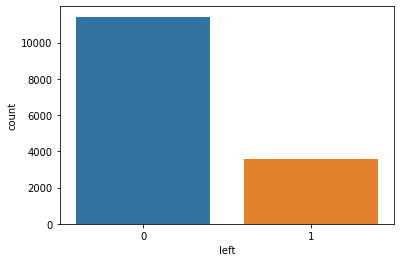

In [12]:
import warnings
warnings.filterwarnings('ignore')
df['left'].value_counts()
sns.countplot(df.left)

In [13]:
print(df.salary.unique())

['low' 'medium' 'high']


In [14]:
df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [15]:
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

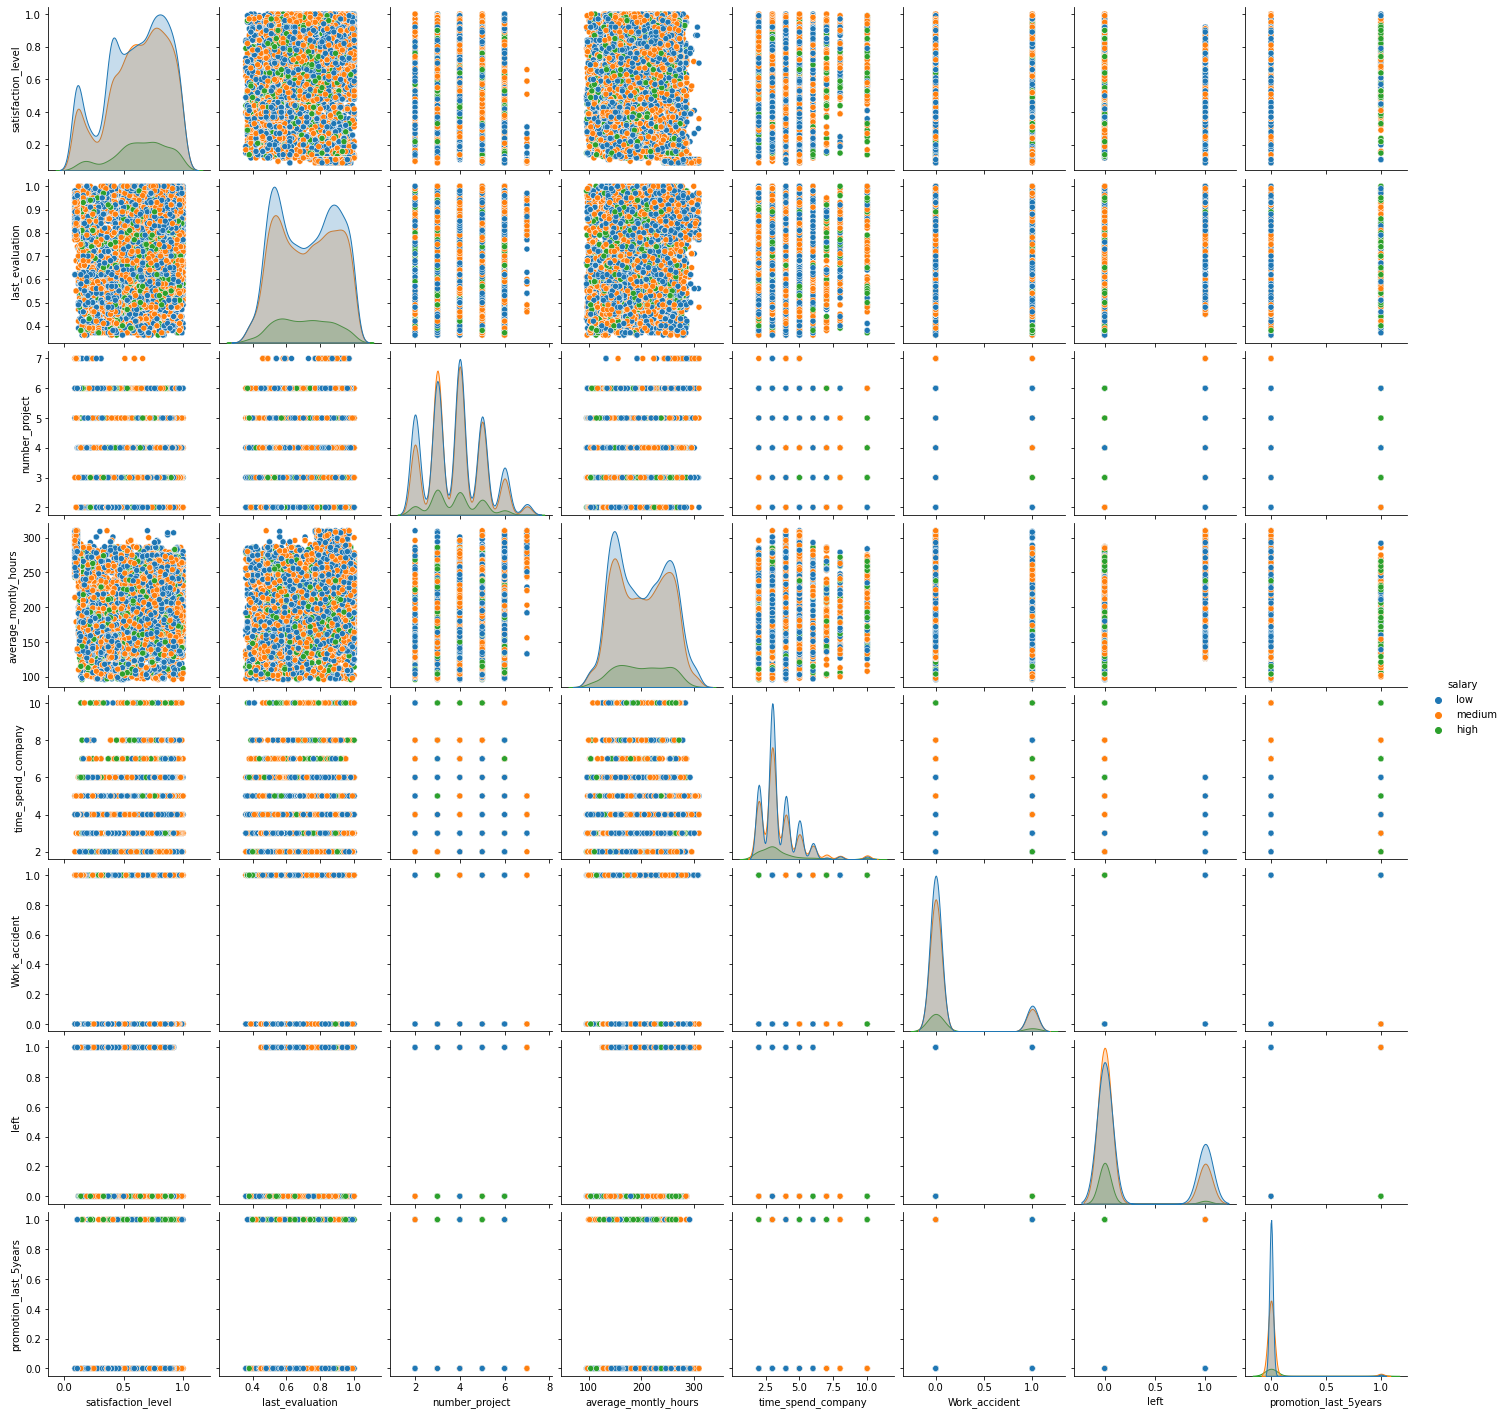

In [16]:
sns.pairplot(df,hue='salary')

**Bivariate**

In [17]:
pd.crosstab(df['department'],df['salary']).style.background_gradient('summer_r')

salary,high,low,medium
department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


Text(0.5, 0, 'Department')

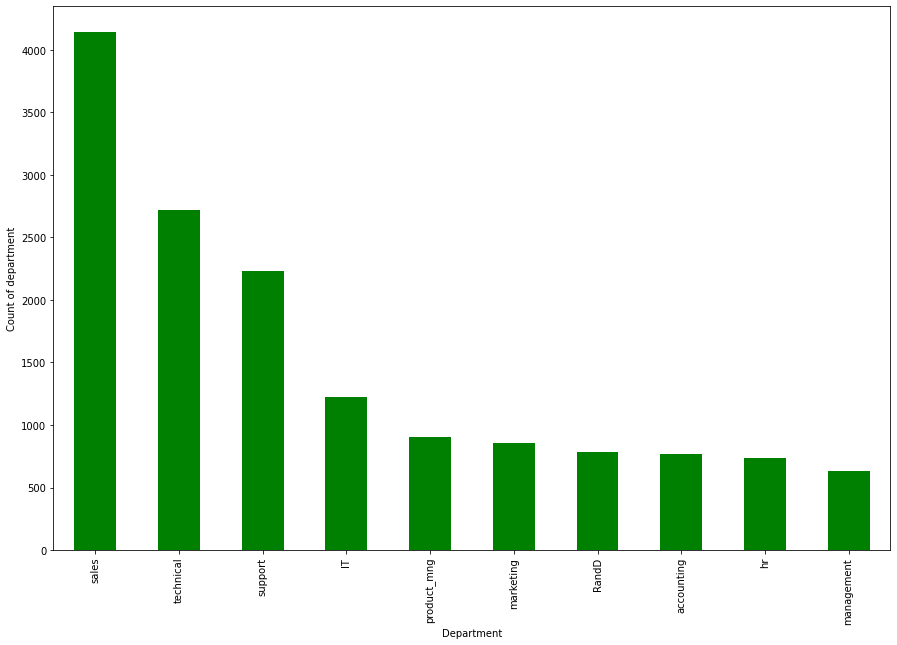

In [18]:
plt.rcParams['figure.figsize']=(15,10)
df['department'].value_counts().plot(kind='bar',color='green')

plt.ylabel('Count of department')
plt.xlabel('Department')

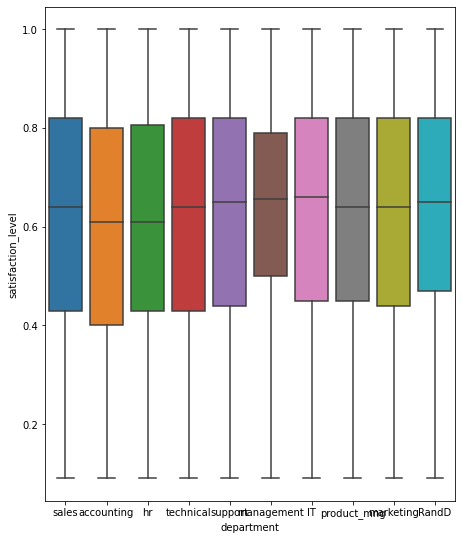

In [19]:
plt.rcParams['figure.figsize']=(25,20)
plt.subplot(2,3,1)
sns.boxplot(y=df['satisfaction_level'],x=df['department'])



**Number of Projects vs Average Monthly Hours**

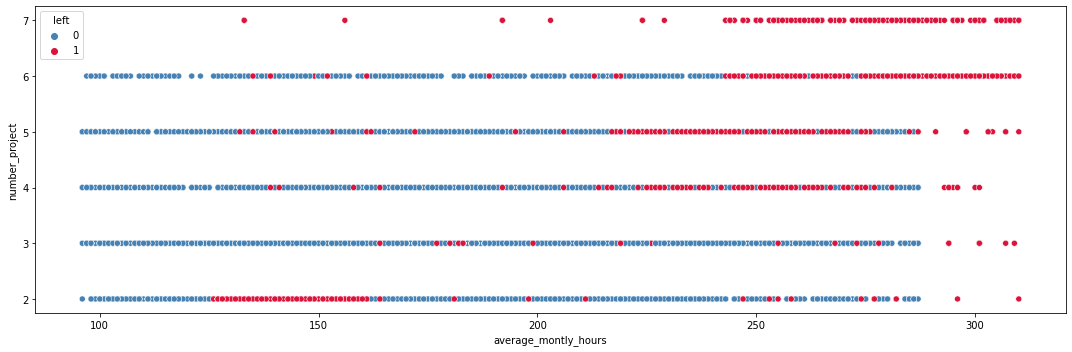

In [55]:
# Scatter Plot with left values
plt.figure(figsize=(15,5))
sns.scatterplot(x=df.average_montly_hours,
            y=df.number_project,
            hue=df.left,
            palette = ('steelblue', 'crimson'))
plt.tight_layout()

It appears that:

employees with more than 4 projects and working more than 217 hours tend to leave the company. employees with less than 3 projects and working less than 161 hours tend to leave the company. A high or a low workload seem to push employees out.

**Last Evaluation vs Satisfaction Level**

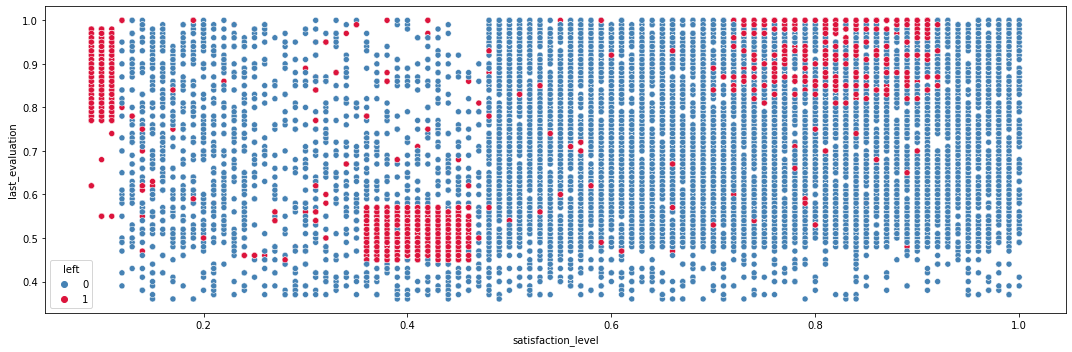

In [21]:
# Scatter Plot with left values
plt.figure(figsize=(15,5))
sns.scatterplot(x=df.satisfaction_level,
            y=df.last_evaluation,
            hue=df.left,
            palette = ('steelblue', 'crimson'))
plt.tight_layout()

Employees with satisfaction level below 0.11 tend to leave the company. Employees with satisfaction level between 0.35 and 0.46 and with last evaluation between 0.44 and 0.57 tend to leave the company. Employees with satisfaction level between 0.71 and 0.92 and with last evaluation between 0.76 and 1 tend to leave the company.

PRE-PROCESSING

In [24]:
for item in df.columns:
    print(item,':',df[item].nunique())

satisfaction_level : 92
last_evaluation : 65
number_project : 6
average_montly_hours : 215
time_spend_company : 8
Work_accident : 2
left : 2
promotion_last_5years : 2
department : 10
salary : 3


In [25]:
df.isnull().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

outlier detection

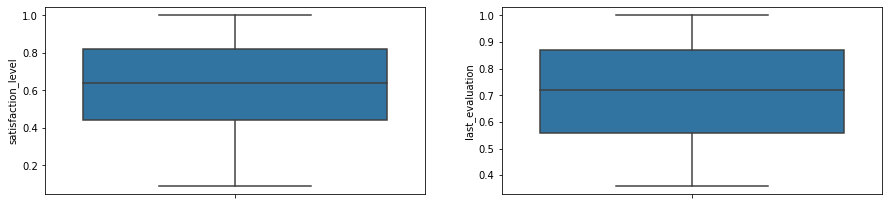

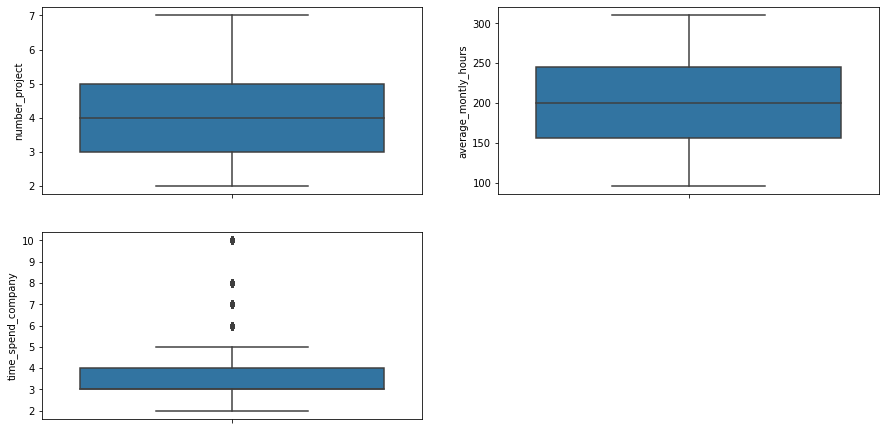

In [26]:
def boxplot(x,i):
    plt.subplot(5,2,i)
    sns.boxplot(y=df[x])
plt.figure(figsize=(15,20))    
    
boxplot('satisfaction_level',1)  
boxplot('last_evaluation',2) 

plt.figure(figsize=(15,20))
boxplot('number_project',1)
boxplot('average_montly_hours',2)
boxplot('time_spend_company',3)


Removal of outlier

In [27]:
age=df['time_spend_company']
q1=np.percentile(age,25)
q3=np.percentile(age,75)
IQR=q3-q1
low=q1-1.5*IQR
upper=q3+1.5*IQR
print(low,upper)

1.5 5.5


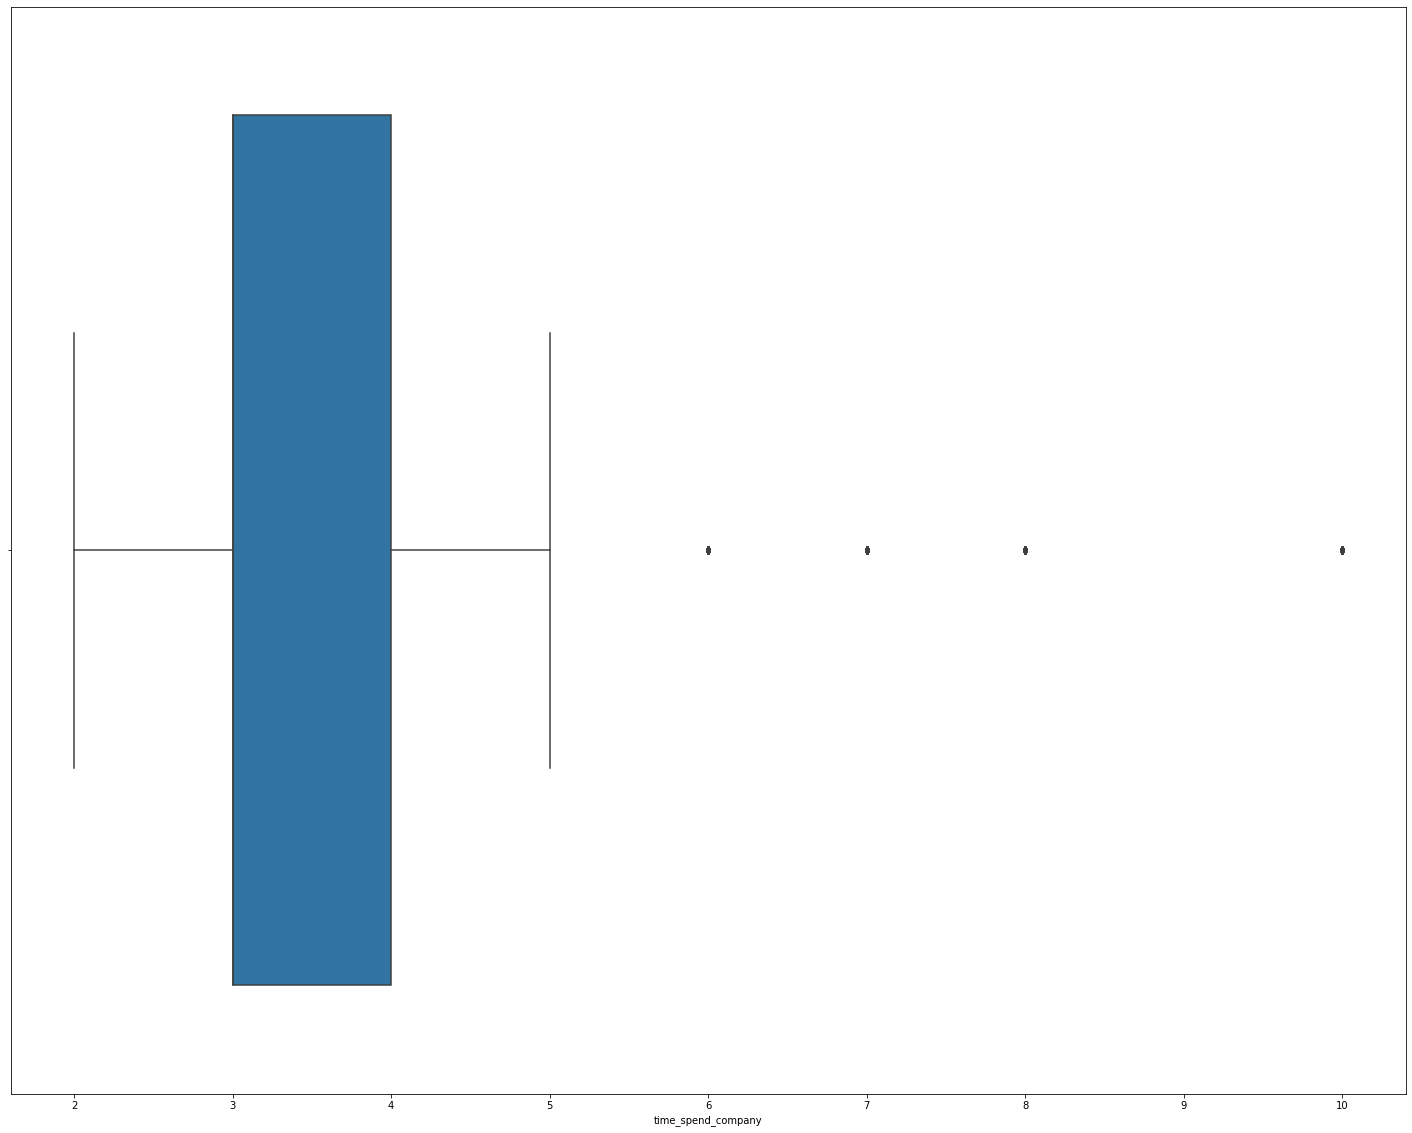

In [28]:
sns.boxplot(df.time_spend_company)

feature reduction

A correlation analysis will allow to identify relationships between the dataset variables. A plot of their distributions highlighting the value of the target variable might also reveal some patterns.

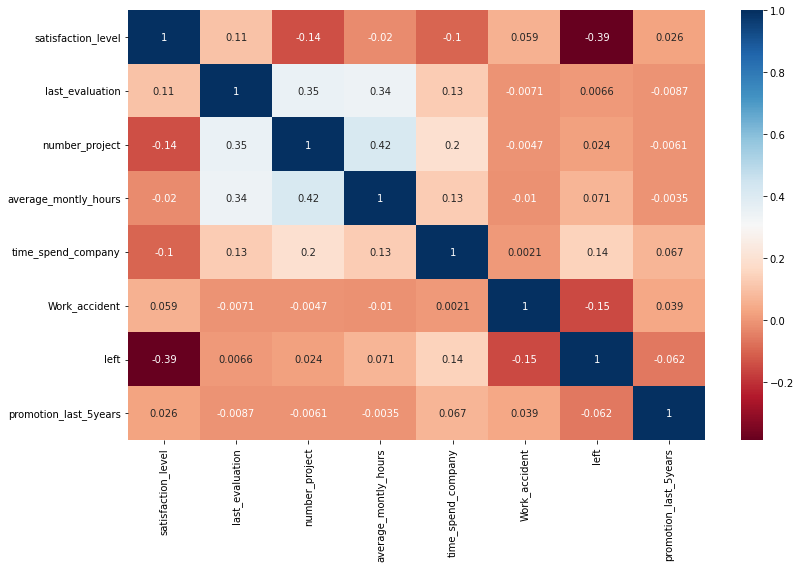

In [29]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='RdBu', annot=True)
plt.tight_layout()


Encoding

The variable salary will be encoded using ordinal encoding and department will be encoded using one-hot encoding.

In [30]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['salary']=le.fit_transform(df['salary'])
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


In [31]:
df=pd.get_dummies(df,drop_first=True )
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,1,0,0


In [32]:
df.columns 

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical'],
      dtype='object')

In [33]:
df.shape

(14999, 18)

Building Model

In [34]:
# Seperate Features and Target
X= df.drop(columns = ['salary'], axis=1)
y= df['salary']

In [35]:
# 20% data as validation set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Here we need to Predict salary so we need to use Regression Models

ML models

In [36]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

In [37]:
Algorithms = [LinearRegression(),  Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor()]
names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor']

In [38]:
r2scorelist=[]

In [39]:
for name in Algorithms:
    model = name
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    r2= metrics.r2_score(y_test,y_pred)
    r2scorelist.append(r2)

In [40]:
evaluation = pd.DataFrame({'Model': names,
                           'R2score': r2scorelist})

In [41]:
evaluation

,Model,R2score
0,Linear Regression,0.006694
1,Ridge Regression,0.006729
2,Lasso Regression,-0.000211
3,K Neighbors Regressor,-0.119980
4,Decision Tree Regressor,-0.405283


MinMax Scaling

In [42]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

In [43]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

now let us find out separately

In [44]:
#linear Regression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
print(metrics.r2_score(y_test,pred))

0.0061796173785563235


In [45]:
#Ridge Regression
RR=Ridge()
RR.fit(X_train,y_train)
pred=RR.predict(X_test)
print(metrics.r2_score(y_test,pred))

0.006182294564758495


In [46]:
#Lasso Regression
la=Lasso()
la.fit(X_train,y_train)
pred=la.predict(X_test)
print(metrics.r2_score(y_test,pred))

-0.00021125248028974752


In [47]:
#KNeighborsRegressor()
KNN=KNeighborsRegressor()
KNN.fit(X_train,y_train)
pred=KNN.predict(X_test)
print(metrics.r2_score(y_test,pred))

-0.09101085481682492


In [48]:
#'Decision Tree Regressor'
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
pred=dt.predict(X_test)
print(metrics.r2_score(y_test,pred))

-0.42648405698778835


In [49]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
pred=rf.predict(X_test)
print(metrics.r2_score(y_test,pred))

0.1929415266483463


In [50]:
#sklearn.ensemble.GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred=GBR.predict(X_test)
print(metrics.r2_score(y_test,pred))

0.02519552467847941


we found out that Random forest regression as the best fit model

Fine Tuning of Hyperparameter

In [51]:
rf.fit(X_train,y_train)
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [52]:
rft=RandomForestRegressor(n_estimators=500,max_depth=1000,random_state=42)
rft.fit(X_train,y_train)

RandomForestRegressor(max_depth=1000, n_estimators=500, random_state=42)

In [53]:
rft.fit(X_train,y_train)
pred=rft.predict(X_test)
print(metrics.r2_score(y_test,pred))

0.2039311960286866
